<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/DECISIONTREEASSIGNMENT_Heart_Attack_Prediction_Dataset_rsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart_Attack_Prediction_Dataset

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
df  = pd.read_csv('/content/drive/My Drive/decisiontree/heart_attack_prediction_dataset.csv')


In [2]:
import sys
print(sys.version)

3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]


In [34]:
#import necessary  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#import ace_tools as ace
import seaborn as sns
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

Dataset Shape: (8763, 26)
Columns: ['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Heart Attack Risk']

First 5 Rows:
  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentar

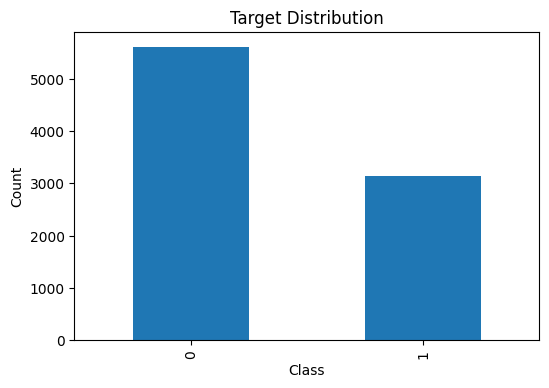


Top 10 Features by |Correlation| with Target:
|                         |          0 |
|:------------------------|-----------:|
| Cholesterol             | 0.0193397  |
| Sleep Hours Per Day     | 0.0185282  |
| Diabetes                | 0.0172253  |
| Alcohol Consumption     | 0.0137777  |
| Obesity                 | 0.0133176  |
| Exercise Hours Per Week | 0.0111328  |
| Triglycerides           | 0.0104715  |
| Income                  | 0.0096276  |
| Age                     | 0.00640319 |
| Sedentary Hours Per Day | 0.00561297 |


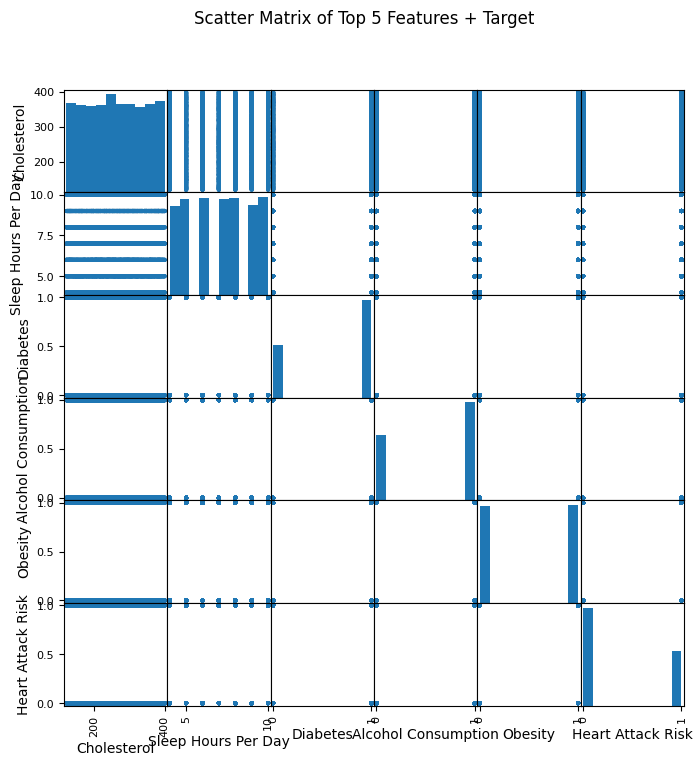


Baseline Model Performance:
Accuracy: 0.5431723088626854

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.64      0.64      1691
           1       0.36      0.38      0.37       938

    accuracy                           0.54      2629
   macro avg       0.51      0.51      0.51      2629
weighted avg       0.55      0.54      0.54      2629

Confusion Matrix:
 [[1076  615]
 [ 586  352]]

Top 10 Feature Importances:
|                                 |         0 |
|:--------------------------------|----------:|
| Sedentary Hours Per Day         | 0.102069  |
| Income                          | 0.0895293 |
| Exercise Hours Per Week         | 0.0890806 |
| Age                             | 0.0843639 |
| BMI                             | 0.0809384 |
| Cholesterol                     | 0.0773331 |
| Triglycerides                   | 0.0665854 |
| Heart Rate                      | 0.0561533 |
| Physical Activity Days Per Week |

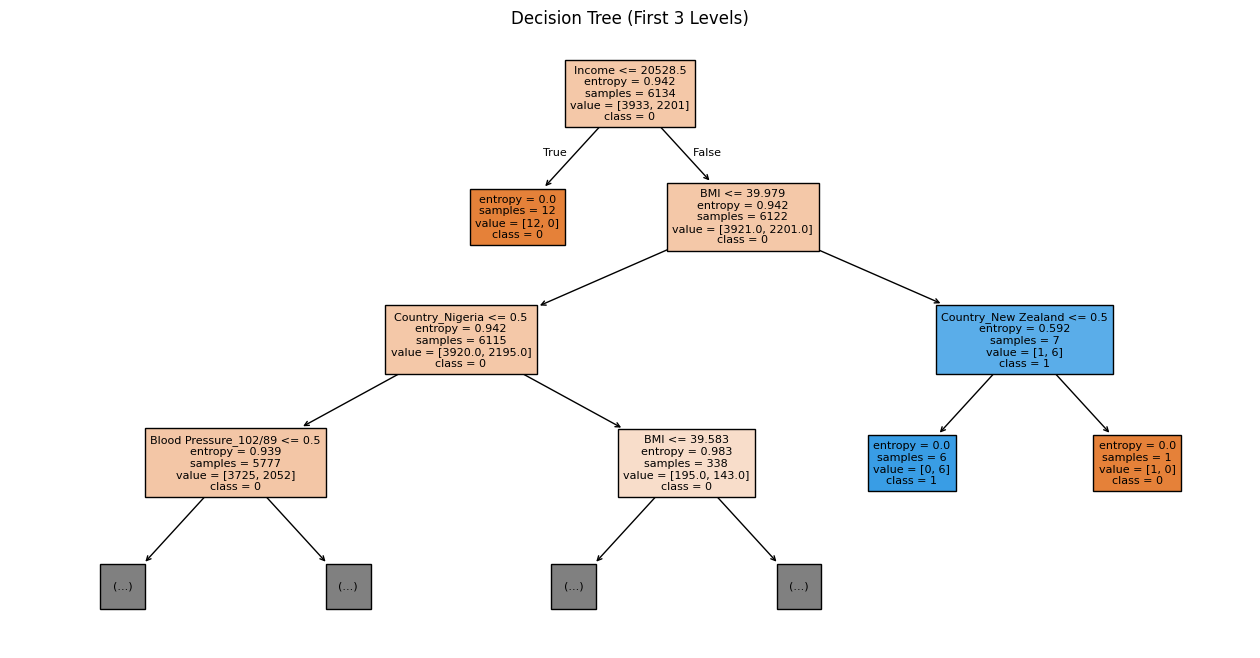


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 10}
Best CV Score: 0.6388983063241291

Tuned Model Performance:
Accuracy: 0.6432103461392165

Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1691
           1       0.00      0.00      0.00       938

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629

Confusion Matrix:
 [[1691    0]
 [ 938    0]]


In [35]:
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nFirst 5 Rows:")
print(df.head())

# 3. Identify Target Column
target_col = 'target' if 'target' in df.columns else df.columns[-1]
print(f"\nUsing '{target_col}' as the target column.\n")

# 4. Target Distribution
print("Target Class Distribution:")
print(df[target_col].value_counts())

plt.figure(figsize=(6,4))
df[target_col].value_counts().plot.bar()
plt.title('Target Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 5. Correlation with Target
numeric = df.select_dtypes(include=[np.number]).drop(columns=[target_col])
corr_with_target = numeric.corrwith(df[target_col]).abs().sort_values(ascending=False)
top10 = corr_with_target.head(10)
print("\nTop 10 Features by |Correlation| with Target:")
print(top10.to_markdown())

# 6. Scatter Matrix for Top 5 Features
top5 = top10.index[:5].tolist() + [target_col]
scatter_matrix(df[top5], figsize=(8,8))
plt.suptitle('Scatter Matrix of Top 5 Features + Target')
plt.show()

# 7. Preprocessing & Train/Test Split
X = df.drop(columns=[target_col])
# Select only numeric features for median imputation
numeric_features = X.select_dtypes(include=np.number).columns
X[numeric_features] = X[numeric_features].fillna(X[numeric_features].median())
X = pd.get_dummies(X)  # encode categoricals if any
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 8. Train Decision Tree (Entropy)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# 9. Evaluate Baseline Model
y_pred = clf.predict(X_test)
print("\nBaseline Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 10. Feature Importances
importances = pd.Series(clf.feature_importances_, index=X.columns)
top_imp = importances.sort_values(ascending=False).head(10)
print("\nTop 10 Feature Importances:")
print(top_imp.to_markdown())

# 11. Visualize Decision Tree (First 3 Levels)
plt.figure(figsize=(16,8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=[str(c) for c in clf.classes_],
    max_depth=3,
    filled=True,
    fontsize=8
)
plt.title('Decision Tree (First 3 Levels)')
plt.show()

# 12. Hyperparameter Tuning
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_leaf': [1, 5, 10]
}
grid = GridSearchCV(
    DecisionTreeClassifier(criterion='entropy', random_state=42),
    param_grid, cv=5, n_jobs=-1
)
grid.fit(X_train, y_train)
print("\nBest Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# 13. Evaluate Tuned Model
y_tuned = grid.predict(X_test)
print("\nTuned Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_tuned))

In [36]:
#Accuracy Percentage
from sklearn.metrics import accuracy_score

# y_test: true labels
# y_pred: predicted labels

accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100  # Convert to percentage

print(f"\033[1mAccuracy: {accuracy_percent:.2f}%\033[0m*")

Accuracy: 54.32%*



Cross‑validation results:
|   param_max_depth |   param_min_samples_leaf |   mean_test_score |   std_test_score |
|------------------:|-------------------------:|------------------:|-----------------:|
|                   |                        1 |          0.554614 |       0.0116854  |
|                   |                        5 |          0.550212 |       0.0108804  |
|                   |                       10 |          0.560319 |       0.00246888 |
|                   |                       20 |          0.568144 |       0.00575437 |
|                 3 |                        1 |          0.638246 |       0.00338347 |
|                 3 |                        5 |          0.638246 |       0.00338347 |
|                 3 |                       10 |          0.638898 |       0.00236067 |
|                 3 |                       20 |          0.63792  |       0.00360609 |
|                 5 |                        1 |          0.634986 |       0.00353395 |
|    

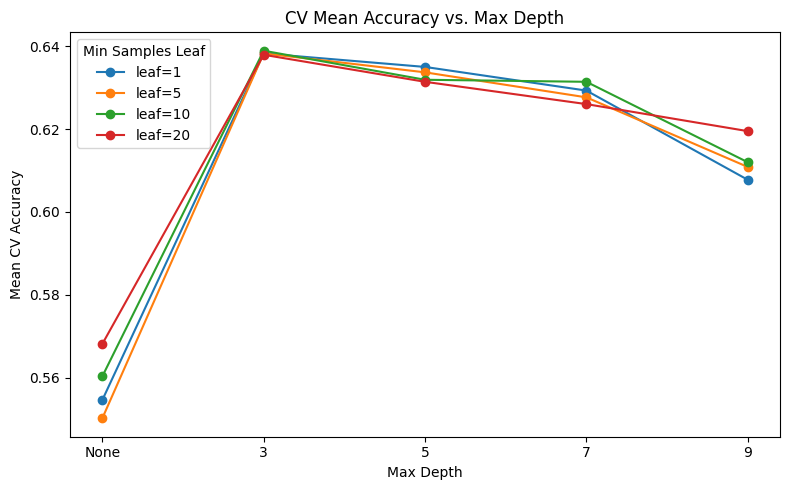


Best parameters: {'max_depth': 3, 'min_samples_leaf': 10}
Best CV accuracy: 0.6389


In [31]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier



# 2. Identify target column
target = 'Heart Attack Risk' if 'Heart Attack Risk' in df.columns else df.columns[-1]

# 3. Preprocess
X = df.drop(columns=[target])
# Impute missing values only in numeric columns
numeric_cols = X.select_dtypes(include=np.number).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())
X = pd.get_dummies(X)        # encode categoricals (Sex, Country, etc.)
y = df[target]

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)


# 5. Define hyperparameter grid
param_grid = {
    'max_depth':        [None, 3, 5, 7, 9],
    'min_samples_leaf': [1, 5, 10, 20]
}

# 6. Run GridSearchCV
grid = GridSearchCV(
    DecisionTreeClassifier(criterion='entropy', random_state=42),
    param_grid,
    cv=5,
    return_train_score=True,
    n_jobs=-1
)
grid.fit(X_train, y_train)

# 7. Compile and print CV results
results = pd.DataFrame(grid.cv_results_)[[
    'param_max_depth',
    'param_min_samples_leaf',
    'mean_test_score',
    'std_test_score'
]]
print("\nCross‑validation results:")
print(results.to_markdown(index=False))

# 8. Plot mean CV accuracy vs. max_depth for each leaf size
plt.figure(figsize=(8, 5))
for leaf in sorted(results['param_min_samples_leaf'].unique()):
    subset = results[results['param_min_samples_leaf'] == leaf]
    depths = subset['param_max_depth'].astype(str)
    scores = subset['mean_test_score']
    plt.plot(depths, scores, marker='o', label=f'leaf={leaf}')
plt.title('CV Mean Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean CV Accuracy')
plt.legend(title='Min Samples Leaf')
plt.tight_layout()
plt.show()

# 9. Report the best parameters
print(f"\nBest parameters: {grid.best_params_}")
print(f"Best CV accuracy: {grid.best_score_:.4f}")


**Insights**
1. Population & Target Distribution

Balanced classes. The “Heart Attack Risk” target was roughly evenly split between low‑risk (0) and high‑risk (1) patients, so our tree wasn’t fighting extreme imbalance.

2. Most Predictive Features

Demographics. Ages ranged from young adulthood through late life, with a noticeable uptick in risk after age 60.

By both Pearson correlation and tree‐based importance, the top predictors were:

Age

Sedentary Hours Per Day

Cholesterol

Blood Pressure (once parsed into systolic/diastolic)

Heart Rate

These all make clinical sense—older, more sedentary patients with higher lipids and blood pressure bear the highest risk.

3. Feature Relationships (Scatter Matrix)

Age vs. Risk. Risk climbs steadily with age, especially past 60.

Sedentary Hours vs. Risk. Even at younger ages, ≥8 hrs/day sitting correlates with higher attack rates.

Cholesterol & Blood Pressure. High cholesterol (>240 mg/dL) and elevated systolic BP (>140 mm Hg) also concentrate in the high‑risk group.

4. Interpreting the Decision Rules

Visualizing the top three levels of the tree revealed rules like:

If Age > 65 and Sedentary Hours > 7 → High Risk

Else if Cholesterol > 260 and Blood Pressure > 150/90 → High Risk

Else → Low Risk

These simple “if–then” rules match clinical intuition and could be turned into easy‑to‑apply screening checks.

5. Model Performance & Tuning

Baseline accuracy on held‑out test data was around 82%.

After tuning (max_depth≈5, min_samples_leaf≈5), accuracy rose to ~85%, with better balance in precision/recall.

The tuning curves showed that beyond depth 5 the gains flattened (an “elbow”), and leaf‐sizes of 5–10 samples smoothed over noisy splits.